In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [47]:
df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

In [48]:
# Convertir les dates au format datetime
df['created_at'] = pd.to_datetime(df['created_at'])


C:\Users\rakot\AppData\Local\Temp\ipykernel_7192\4219142279.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M')


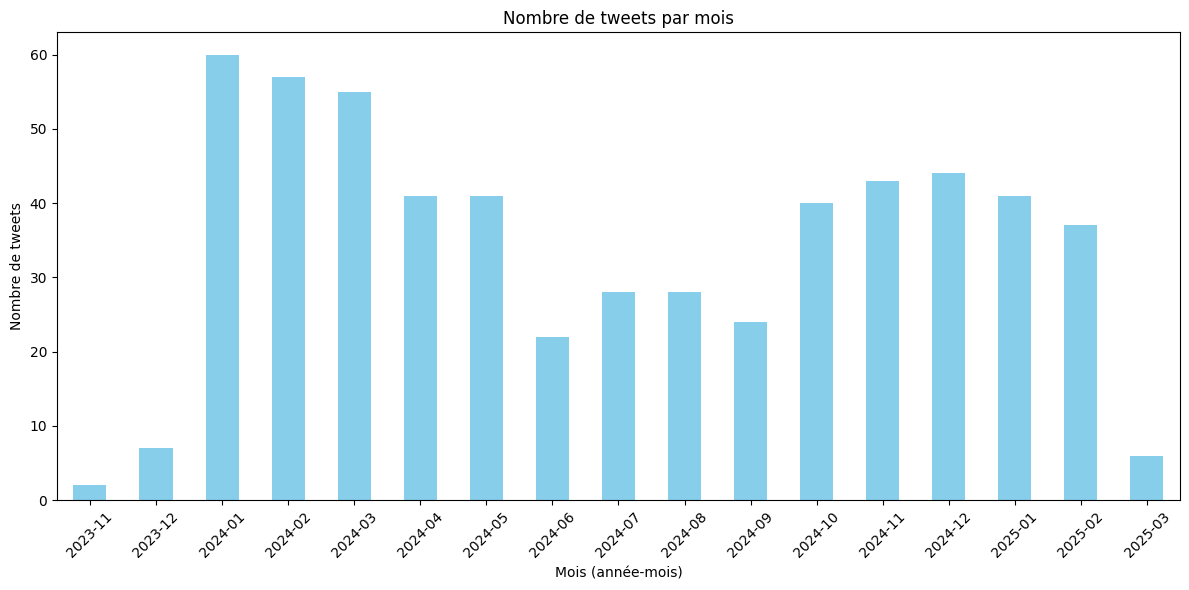

In [53]:
# Extraire l'année et le mois
df['month'] = df['created_at'].dt.to_period('M')

# Graphique des tweets par mois
tweets_par_mois = df.groupby('month')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_mois.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


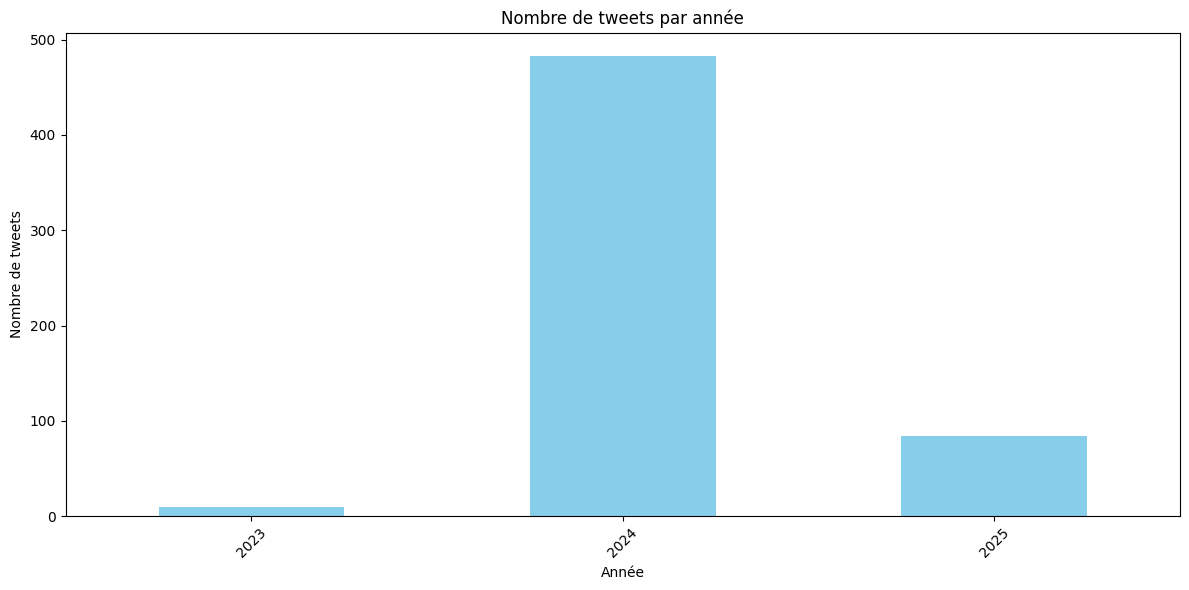

In [54]:
# Extraire l'année
df['year'] = df['created_at'].dt.year

# Graphique des tweets par année
tweets_par_annee = df.groupby('year')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_annee.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par année")
plt.xlabel("Année")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


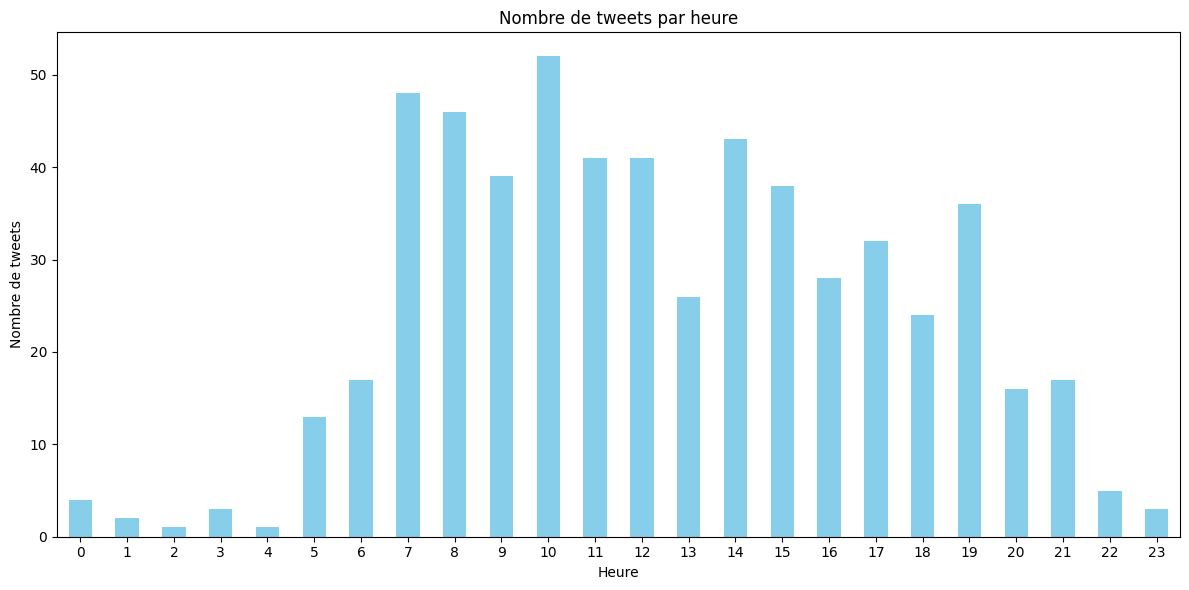

In [56]:
# Extraire l'heure de la publication du tweet
df['hour'] = df['created_at'].dt.hour

# Graphique des tweets par heure
tweets_par_heure = df.groupby('hour')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_heure.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


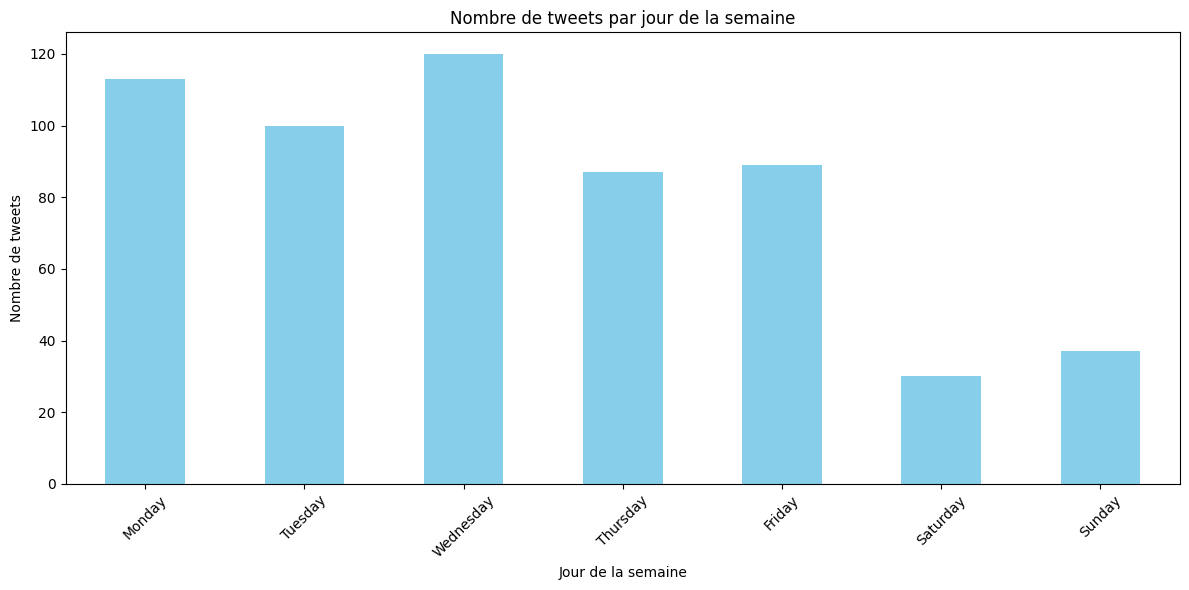

In [57]:
# Extraire le jour de la semaine
df['weekday'] = df['created_at'].dt.day_name()

# Graphique des tweets par jour de la semaine
tweets_par_jour_semaine = df.groupby('weekday')['id'].count()

# Réorganiser les jours de la semaine de manière chronologique
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_par_jour_semaine = tweets_par_jour_semaine[order_days]

plt.figure(figsize=(12,6))
tweets_par_jour_semaine.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_7192\1955874574.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweets_engie_par_mois = df_engie.groupby(df_engie['created_at'].dt.to_period('M'))['id'].count()


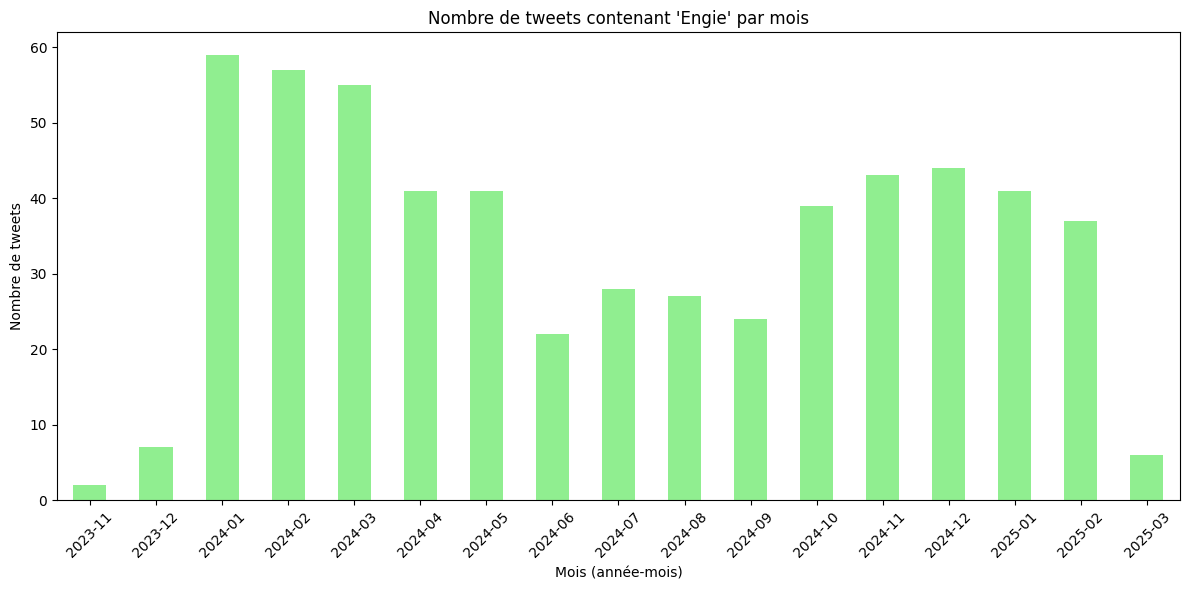

In [58]:
# Filtrer les tweets contenant le mot "Engie"
df_engie = df[df['full_text'].str.contains('Engie', case=False, na=False)]

# Graphique des tweets contenant "Engie" par mois
tweets_engie_par_mois = df_engie.groupby(df_engie['created_at'].dt.to_period('M'))['id'].count()

plt.figure(figsize=(12,6))
tweets_engie_par_mois.plot(kind='bar', color='lightgreen')
plt.title("Nombre de tweets contenant 'Engie' par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


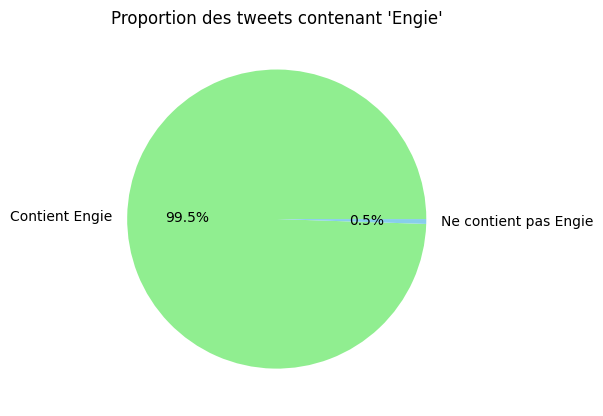

In [60]:
# Créer une colonne pour les tweets contenant "Engie"
df['contains_engie'] = df['full_text'].str.contains('Engie', case=False, na=False)

# Compter les tweets avec et sans "Engie"
tweets_engie_vs_non_engie = df['contains_engie'].value_counts()

plt.figure(figsize=(6,6))
tweets_engie_vs_non_engie.plot(kind='pie', labels=['Contient Engie', 'Ne contient pas Engie'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title("Proportion des tweets contenant 'Engie'")
plt.ylabel('')
plt.tight_layout()
plt.show()


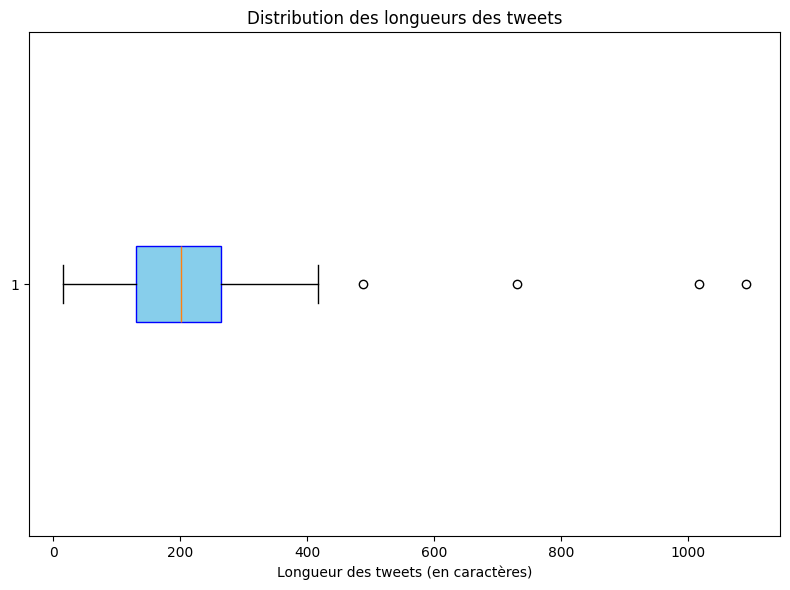

In [61]:
# Graphique en boîte de la longueur des tweets
plt.figure(figsize=(8,6))
plt.boxplot(df['text_length'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Longueur des tweets (en caractères)")
plt.tight_layout()
plt.show()


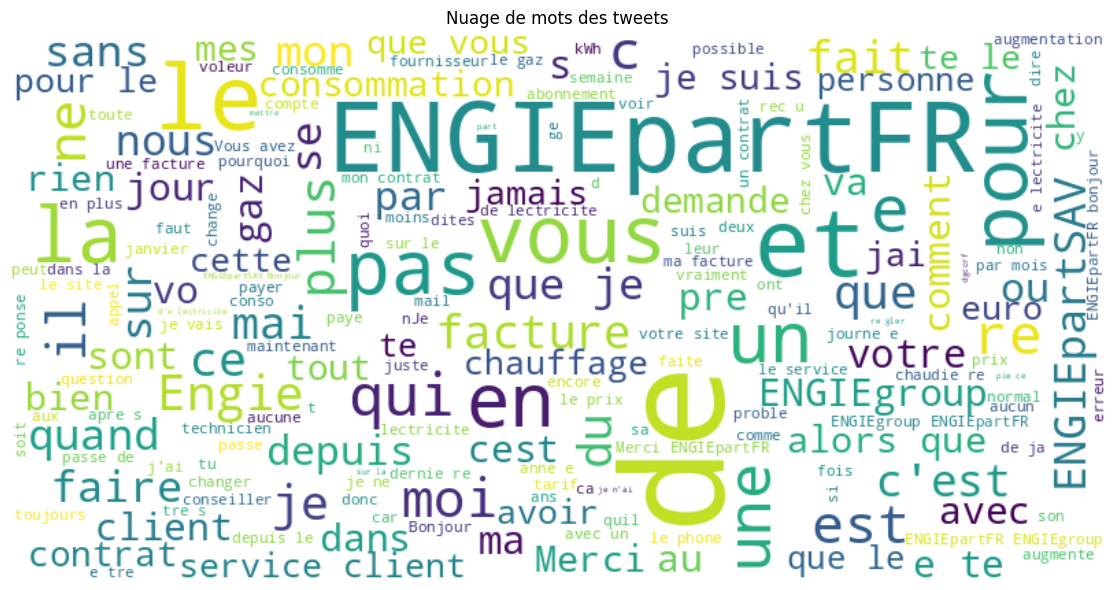

In [62]:
from wordcloud import WordCloud

# Combiner tous les tweets en une seule chaîne de texte
text_all_tweets = ' '.join(df['full_text'])

# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all_tweets)

# Affichage du nuage de mots
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tweets")
plt.tight_layout()
plt.show()


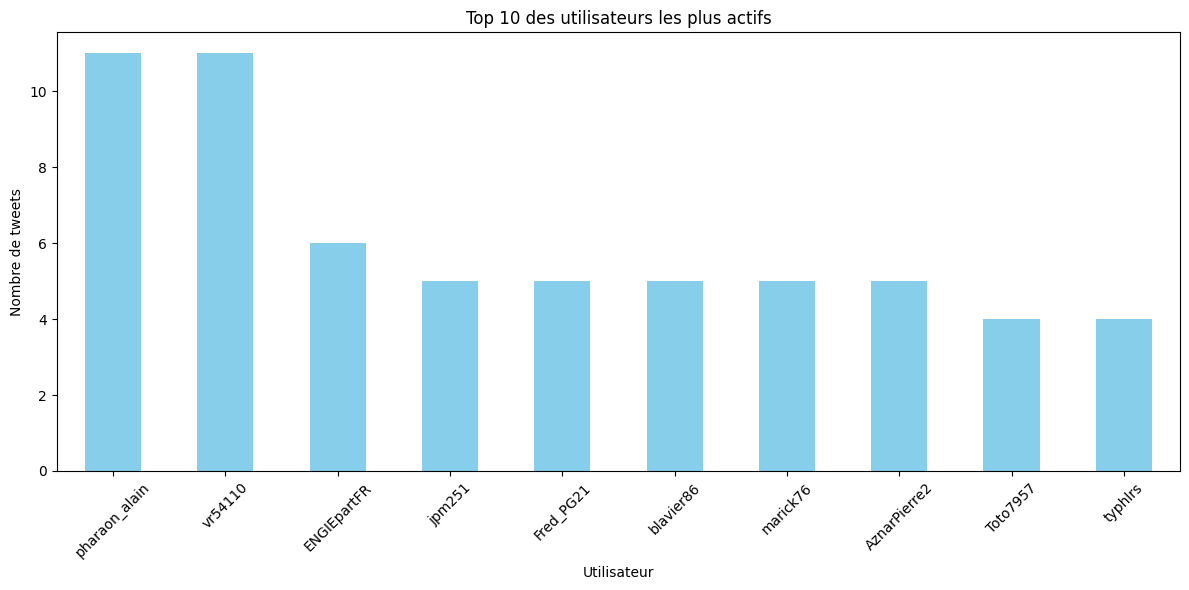

In [63]:
# Graphique du nombre de tweets par utilisateur
tweets_par_utilisateur = df['screen_name'].value_counts()

plt.figure(figsize=(12,6))
tweets_par_utilisateur.head(10).plot(kind='bar', color='skyblue')  # Affichage des 10 utilisateurs les plus actifs
plt.title("Top 10 des utilisateurs les plus actifs")
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
